## Question #1 (50 points)

***This question consists of plotting and a conceptual question. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for anharmonically coupled oscillators, create a figure that superimposes

* a contour plot of the potential energy, and;
* the trajectory of $Q_1$ and $Q_2$.

### Point breakdown

* Contour plot (20 points)
* Trajectory plot (20 points)
* Physical explanation (10 points)

### The potential energy

$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

### Constrained parameters and initial conditions

Take $K_1 = 1$, $K_2 = 0.2$, $M_1 = M_2 = 1$, and $C=0.5$. For the initial conditions, take $Q_1(0) = 0$, $Q_2(0) = 1$, and both velocities starting at zero.

### Plotting constraints
Plot $Q_1$ and $Q_2$ on the horizontal and vertical axes, respectively. I suggest a meshgrid of at least $100 \times 100$ points.

For your contour plot, combine `plt.contour` and `plt.contourf` with code similar to the following:

* `plt.contourf(Q1_grid, Q2_grid, U_grid, levels=50, cmap='viridis')`
* `plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)`

Also, use `plt.xlim(-1.5, 1.5)` and `plt.ylim(-1.5, 1.5)`

Don't forget to label your axes.

### Getting and plotting the trajectory

To get the trajectory, you will need to set up and solve the equations of motion, as we did in previous homework and in class. Then you can plot $Q_2$ versus $Q_1$ with `matplotlib` using a line of code similar to `plt.plot(Q1, Q2, color='red', label="Trajectory")`.

Plot the trajectory from $t=0$ to $t=50$, with an appropriate choice of mesh points to ensure the trajectory is resolved. (e.g. `t_mesh = np.linspace(0, 50, 200)`)

### Physical explanation

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

Why do the dynamics differ when only $Q_1$ is initially displaced compared to when only $Q_2$ is initially displaced? How does this relate to the coupling term in the potential energy? What is the physical interpretation? You could use our cylindrical beam example from class to describe this, if you like.


$$ \Delta U = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + \frac{1}{3} C Q_1 Q_2^2 $$

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot_coupled_oscillators(K1,K2,C):
    # define potential energy function
    def coupled_potentials(Q1, Q2, K1 = 1.0, K2 = 0.2, C = 0.5):
        return 0.5*K1*Q1**2 + 0.5*K2*Q2**2 + C*Q1*Q2**2/3
    
    # define mesh for plotting
    Q1 = np.linspace(-1.5, 1.5, 100)
    Q2 = np.linspace(-1.5, 1.5, 100)
    Q1_grid, Q2_grid = np.meshgrid(Q1,Q2)
    
    # define potential energy values
    U_grid = coupled_potentials(Q1_grid,Q2_grid,K1,K2,C)
    
    # construct contour plot
    plt.figure(figsize = (5,4))
    plt.contourf(Q1_grid,Q2_grid,U_grid, levels=50, cmap='viridis')
    plt.plot(Q1, Q2, color='red', label="Trajectory")
    # plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)
    plt.title("Potential Energy of a 2D Harmonic Oscillator")
    plt.colorbar(label = "Potential energy $U(Q)$")
    plt.xlabel("Displacement $Q_1$")
    plt.ylabel("Displacement $Q_2$")
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    plt.show()

widgets.interact(plot_coupled_oscillators,
                 K1  = widgets.FloatSlider(value = 1.0, min = -20.0, max = 20.0, step = 0.1, description = "$K_1$"),
                 K2  = widgets.FloatSlider(value = 0.2, min = -20.0, max = 20.0, step = 0.1, description = "$K_2$"),
                 C   = widgets.FloatSlider(value = 0.5, min = -5.0, max = 5.0, step = 0.1, description = "$C$")
                )

interactive(children=(FloatSlider(value=1.0, description='$K_1$', max=20.0, min=-20.0), FloatSlider(value=0.2,…

<function __main__.plot_coupled_oscillators(K1, K2, C)>

**Observations from interactive graph:**
* Adjusting $K_1$ changes the amplitude of $Q_1$, and how steep the slope of the well is. Negative $K_1$ flips the parabola upside down. As expected, it does not have an effect on $Q_2$
* Adjusting $K_2$ has the same effect on $Q_2$ and $Q_1$ that $K_1$ does on $Q_1$ and $Q_2$ respectively
* For increasing $C$, the $Q_2$ contour becomes flattened out where $Q_1 = 0$. When $Q_1$ is offset to the negative, the $Q_2$ contour becomes a negative parabola, and when $Q_1$ is offset to the positive, the $Q_2$ potential is a regular parabola
* For decreasing $C$, the same effect occurs but in reverse (i.e. moving $Q_1$ to the negative direction causes the $Q_2$ potential to form a positive parabola)
* Adjusting $C$ yields a similar effect on $Q_1$ — for positive $C$ and $Q_2$ shifted from the origin, the $Q_1$ potential forms a cubic curve with a saddle point at $Q_1 = 0$. For negative $C$, the cubic curve is negative. The curve is the same regardless of which direction $Q_2$ is shifted in

# [FIGURE OUT THE PHYSICAL EXPLANATION FOR THIS BEHAVIOR FROM THE MODEL]

## Equations of Motion:

$\vec{F} = m\vec{\ddot Q} = \nabla U(\vec{Q})$

$m\vec{\ddot Q} = -\hat{q_1}(K_1Q_1 + \frac13CQ_2^2) - \hat{q_2}(K_2Q_2 + \frac23CQ_1Q_2)$

$\ddot Q_1 = -\frac{K_1}{M_1}Q_1 - \frac13\frac{C}{M_1}Q_2^2, \ddot Q_2 = -\frac{K_2}{M_2} - \frac23\frac{C}{M_2}Q_1Q_2$

In [1]:
# import sympy as sp

# # Define the symbolic variables and function
# Q01, Q2, K1, M1, C, t = sp.symbols('Q1 Q01 K1 M1 C t')
# Q1 = sp.Function('Q1')(t)

# # Q1"(t) = -K1/M1*Q1 - 1/3*C/M1*Q2^2
# diff_eq = sp.Eq(Q1.diff(t).diff(t), -K1/M1*Q1 - 1/3*C/M1*Q2**2)

# # Solve the differential equation
# general_solution = sp.dsolve(diff_eq, Q1)

# # Extract the solution for y(x)
# solution_Q1 = general_solution.rhs

* Use RK45 solver to get the equations of motion and put into the above graph for the trajectory

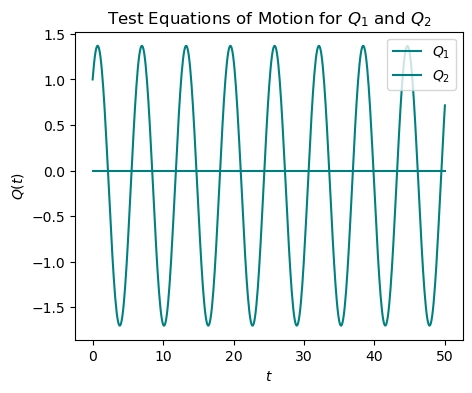

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.integrate import solve_ivp

# initial conditions
Q0 = [1.0, 1.0]
V0 = [0.0, 0.0]
K  = [1.0, 0.2]
M  = [1.0, 1.0]
C  = 0.5
t_max = 50

y0 = Q0, V0

def Q1_eqs_motion(t_vals, y, Q2, K, M, C):
    Q1, V = y
    dQdt = V
    dVdt = -K[0]*Q1 - C*Q2**2/3
    return [dQdt, dVdt]

def Q2_eqs_motion(t_vals, y, Q1, K, M, C):
    Q2, V = y
    dQdt = V
    dVdt = -K[1]*Q2 - 2*C*Q1*Q2/3
    return [dQdt, dVdt]
    
Q1_sol = solve_ivp(Q1_eqs_motion,
                   [0, t_max],
                   y0[0],
                   t_eval=np.linspace(0, t_max, 500),
                   args=(Q0[0], K, M, C))

Q2_sol = solve_ivp(Q2_eqs_motion,
                   [0, t_max],
                   y0[1],
                   t_eval=np.linspace(0, t_max, 500),
                   args=(Q0[1], K, M, C))

# define mesh for plotting
t_vals = np.linspace(0,t_max,500)
Q1_mesh = Q1_sol.y[0]
Q2_mesh = Q2_sol.y[0]

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(t_vals, Q1_mesh, color="teal", label="$Q_1$")
plt.plot(t_vals, Q2_mesh, color="teal", label="$Q_2$")
plt.title("Test Equations of Motion for $Q_1$ and $Q_2$")
plt.xlabel("$t$")
plt.ylabel("$Q(t)$")
# plt.xlim(0,t_max)
# plt.ylim(-1.8,1.8)
# plt.axhline(linewidth='0.4', color='grey')
# plt.axvline(x = period_interp(Q0), linewidth='0.4', color='grey')
plt.legend()
plt.show()
# print(period_interp(Q0))

With your code complete, you can test four cases for the initial conditions (all with the initial velocity set to zero):

1. $Q_1(0) = 0$, $Q_2(0) = 1$ (**submit this plot**)
2. $Q_1(0) = 0$, $Q_2(0) = -1$
3. $Q_1(0) = 1$, $Q_2(0) = 0$
4. $Q_1(0) = -1$, $Q_2(0) = 0$

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot_coupled_oscillators(K1,K2,C):
    # define potential energy function
    def coupled_potentials(Q1, Q2, K1 = 1.0, K2 = 0.2, C = 0.5):
        return 0.5*K1*Q1**2 + 0.5*K2*Q2**2 + C*Q1*Q2**2/3
    
    # define mesh for plotting
    Q1 = np.linspace(-1.5, 1.5, 100)
    Q2 = np.linspace(-1.5, 1.5, 100)
    Q1_grid, Q2_grid = np.meshgrid(Q1,Q2)
    
    # define potential energy values
    U_grid = coupled_potentials(Q1_grid,Q2_grid,K1,K2,C)
    
    # construct contour plot
    plt.figure(figsize = (5,4))
    plt.contourf(Q1_grid,Q2_grid,U_grid, levels=50, cmap='viridis')
    plt.plot(Q1_mesh, Q2_mesh, color='red', label="Trajectory")
    # plt.contour(Q1_grid, Q2_grid, U_grid, levels=50, colors='white', linewidths=1)
    plt.title("Potential Energy of a 2D Harmonic Oscillator")
    plt.colorbar(label = "Potential energy $U(Q)$")
    plt.xlabel("Displacement $Q_1$")
    plt.ylabel("Displacement $Q_2$")
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    plt.show()

widgets.interact(plot_coupled_oscillators,
                 K1  = widgets.FloatSlider(value = 1.0, min = -20.0, max = 20.0, step = 0.1, description = "$K_1$"),
                 K2  = widgets.FloatSlider(value = 0.2, min = -20.0, max = 20.0, step = 0.1, description = "$K_2$"),
                 C   = widgets.FloatSlider(value = 0.5, min = -5.0, max = 5.0, step = 0.1, description = "$C$")
                )

interactive(children=(FloatSlider(value=1.0, description='$K_1$', max=20.0, min=-20.0), FloatSlider(value=0.2,…

<function __main__.plot_coupled_oscillators(K1, K2, C)>

#### NOTE

Contour plot: take from that homework where we first started learning how to plot, adjust to make it anharmonic

Trajectory plot: find eqs of motion (easy) and make sure to get the correct value for $\omega$ (less easy)

and then play around with the plot to find the physical explanation (can imagine as oscillators, e.g. springs?)